In [1]:
import pandas as pd

In [2]:
df_wals = pd.read_csv('wals_language.csv')
print(df_wals.shape)
df_wals.head()

(2679, 202)


,wals_code,iso_code,glottocode,Name,latitude,longitude,genus,family,macroarea,countrycodes,...,137B M in Second Person Singular,136B M in First Person Singular,109B Other Roles of Applied Objects,10B Nasal Vowels in West Africa,25B Zero Marking of A and P Arguments,21B Exponence of Tense-Aspect-Mood Inflection,108B Productivity of the Antipassive Construction,130B Cultural Categories of Languages with Identity of 'Finger' and 'Hand',58B Number of Possessive Nouns,79B Suppletion in Imperatives and Hortatives
0,aab,NaN,NaN,Arapesh (Abu),-3.450000,142.950000,Kombio-Arapesh,Torricelli,NaN,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,aar,aiw,aari1239,Aari,6.000000,36.583333,South Omotic,Afro-Asiatic,Africa,ET,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,aba,aau,abau1245,Abau,-4.000000,141.250000,Upper Sepik,Sepik,Papunesia,PG,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,abb,shu,chad1249,Arabic (Chadian),13.833333,20.833333,Semitic,Afro-Asiatic,Africa,TD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,abd,abi,abid1235,Abidji,5.666667,-4.583333,Kwa,Niger-Congo,Africa,CI,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
df_language_url = pd.read_csv('../data\lang_url_dataset_0709.csv')
print(df_language_url.shape)
df_language_url.head()

FileNotFoundError: [Errno 2] No such file or directory: '../data\\lang_url_dataset_0709.csv'

In [ ]:
import json 

path = "data.json"
with open(path, "w") as f:
     json.dump({"test message": 1}, f)

In [4]:
from pathlib import Path
txt = Path(path).read_text()

NameError: name 'path' is not defined

In [5]:
eval(txt)

NameError: name 'txt' is not defined

In [30]:
from datetime import datetime

datetime_str = '09/19/22 13:55:26'

datetime_object = datetime.strptime(datetime_str, '%m/%d/%y %H:%M:%S')

print(type(datetime_object))
print(datetime_object)  # printed in default format

<class 'datetime.datetime'>
2022-09-19 13:55:26


In [31]:
datetime_object.strftime('%m/%d/%y %H:%M:%S')

'09/19/22 13:55:26'

In [28]:
tuple({1:2}.items())[-1]

(1, 2)

datetime.datetime(2022, 9, 19, 13, 55, 26)

In [1]:
import pandas as pd

In [2]:
df_language_url = pd.read_csv('lang_url.csv')
print(df_language_url.shape)
df_language_url.head()

(55106, 2)


,language,url
0,Arabic (Chadian),https://aclanthology.org/2022.woah-1.1
1,Arabic (Beirut),https://aclanthology.org/2022.woah-1.1
2,Arabic (Bahrain),https://aclanthology.org/2022.woah-1.1
3,Arabic (Egyptian),https://aclanthology.org/2022.woah-1.1
4,Arabic (Eastern Libyan),https://aclanthology.org/2022.woah-1.1


In [4]:
df_language_url['no_brackets'] = df_language_url.language.apply(lambda x: x.split('(')[0].strip())
#df_unique = df_language_url[['no_brackets', 'url']].drop_duplicates(subset=['no_brackets', 'url'])
print(df_language_url.shape)
df_language_url.head()

(55106, 3)


,language,url,no_brackets
0,Arabic (Chadian),https://aclanthology.org/2022.woah-1.1,Arabic
1,Arabic (Beirut),https://aclanthology.org/2022.woah-1.1,Arabic
2,Arabic (Bahrain),https://aclanthology.org/2022.woah-1.1,Arabic
3,Arabic (Egyptian),https://aclanthology.org/2022.woah-1.1,Arabic
4,Arabic (Eastern Libyan),https://aclanthology.org/2022.woah-1.1,Arabic


In [41]:
df_new = df_language_url[df_language_url.no_brackets != "One"]

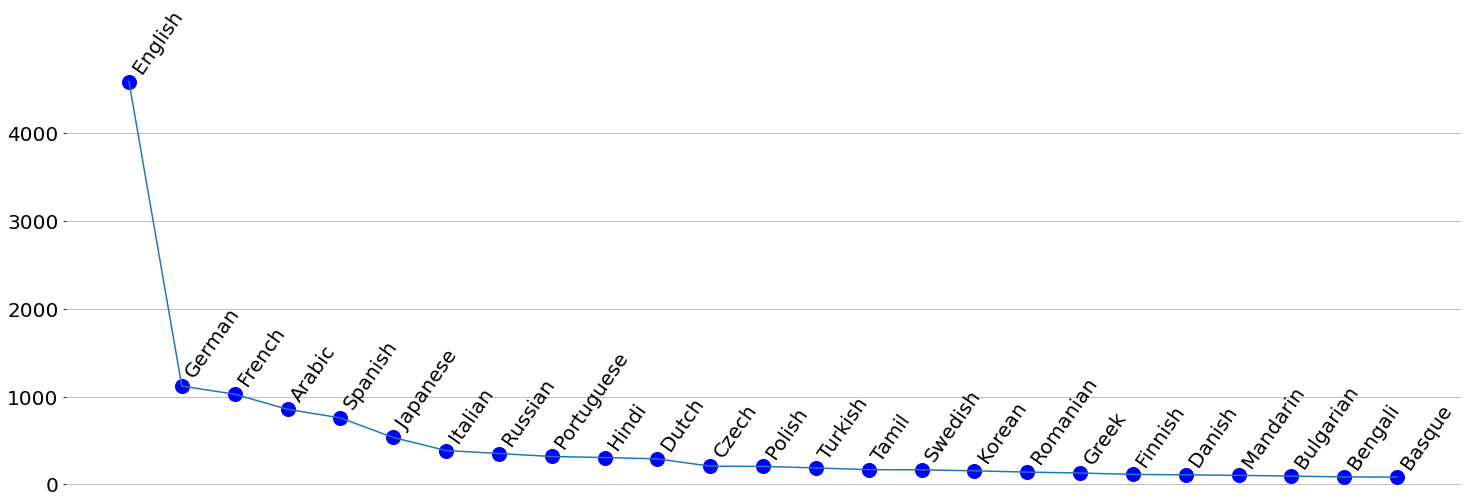

In [61]:
import matplotlib.pyplot as plt

citations = df_new[["url", "no_brackets"]].drop_duplicates().no_brackets.value_counts().tolist()
languages = df_new[["url", "no_brackets"]].drop_duplicates().no_brackets.value_counts().index.tolist()

plt.figure(figsize=(25, 8))
plt.tick_params(
    axis='x',          # changes apply to the x-axis
    which='both',      # both major and minor ticks are affected
    bottom=False,      # ticks along the bottom edge are off
    top=False,         # ticks along the top edge are off
    labelbottom=False) # labels along the bottom edge are off

plt.yticks(fontsize=20)

plt.plot(citations[:25], 'bo', markersize=14)
plt.plot(citations[:25])

for i, txt in enumerate(languages[:25]):
    plt.annotate(txt, (i, citations[i]+100), fontsize=20, rotation = 55)


for pos in ['right', 'top', 'bottom', 'left']:
    plt.gca().spines[pos].set_visible(False)
plt.grid(axis="y")

#plt.show()
plt.savefig("1701_lang_distribution.png",
            bbox_inches ="tight",
           dpi=100)

In [59]:
plt.savefig("1701_lang_distribution.png",
            bbox_inches ="tight",
           dpi=100)

<Figure size 432x288 with 0 Axes>

In [56]:
plt.savefig('comparison.png', dpi=200) 

<Figure size 432x288 with 0 Axes>

In [64]:
a = """
Akan, Atikamekw, Bambara, Bhojpuri, Bislama,
Cantonese, Chamorro, Cherokee, Cheyenne, Chichewa, 
Coptic, Dagbani, Ewe, Greenlandic (South), Guaraní, 
Kashmiri, Kikuyu, Komi-Zyrian, Kongo, Koryak, 
Kurmanji, Madurese', Nadroga, Nanai, Nauruan, Quiché,
Romani (Lovari), Rundi, Samoan, Sango, Sesotho, Shor, 
Sranan, Swati, Tabassaran, Tahitian, Tat (Muslim), 
Tigrinya, Tofa, Tok Pisin, Tsakhur, Tsonga, Udi, Venda, Yukaghir (Kolyma), Zhuang (Northern)
""".split(',')

In [65]:
len(a)

46